# サポートベクターマシン（Support Vector Machines）

サポートベクターマシン (SVM)は、サンプル群を上手に分類する境界線を見つけようとする方法です。多クラス分類にも利用可能です。

目次

    Part 1: SVMの原理
    Part 2: カーネル法
    Part 3: その他の資料
    Part 4: scikit-learnでSVM

## Part 1: SVMの原理

まずは、SVMのおおまかな原理を掴んでいきましょう。

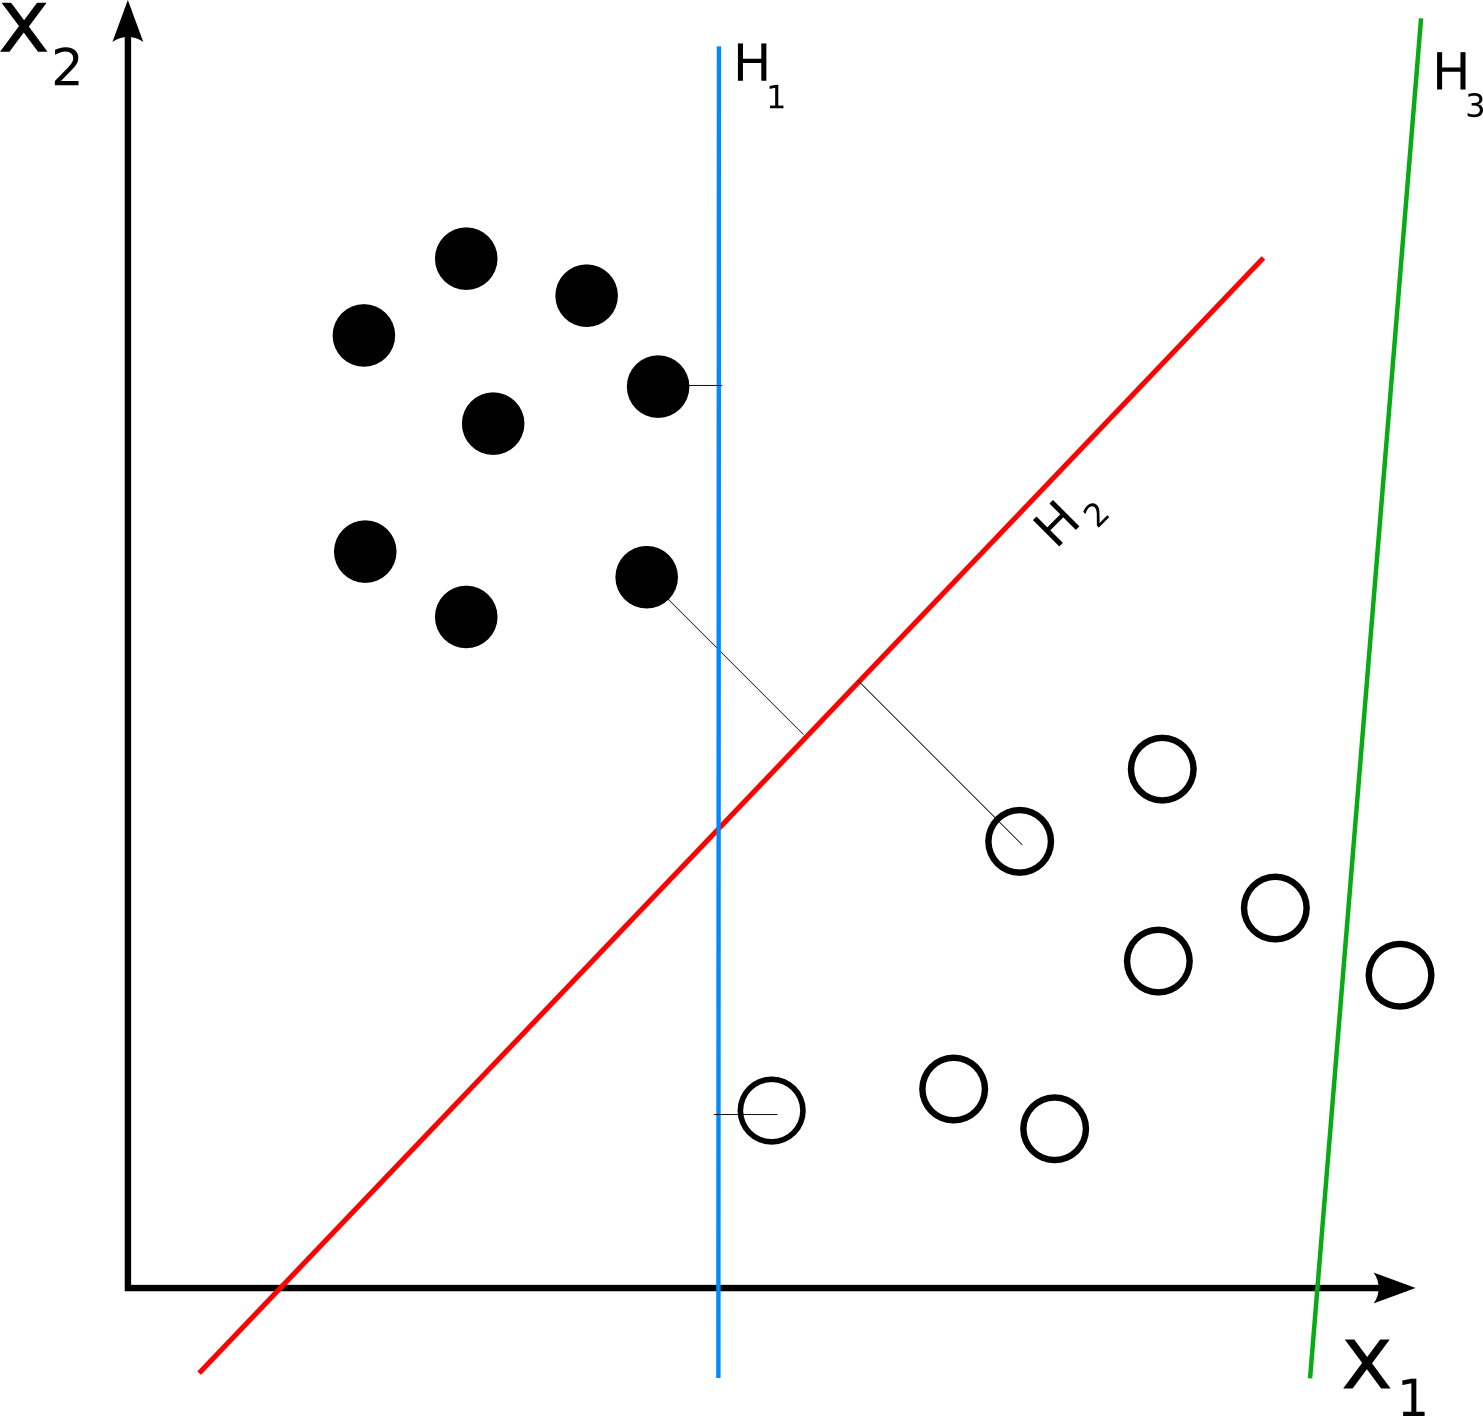

In [2]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png'
Image(url, width=450)

## Part 2: カーネル法

いつも超平面で分離できるとは限りません。そんな時、役に立つのがカーネル法と呼ばれる、工夫です。

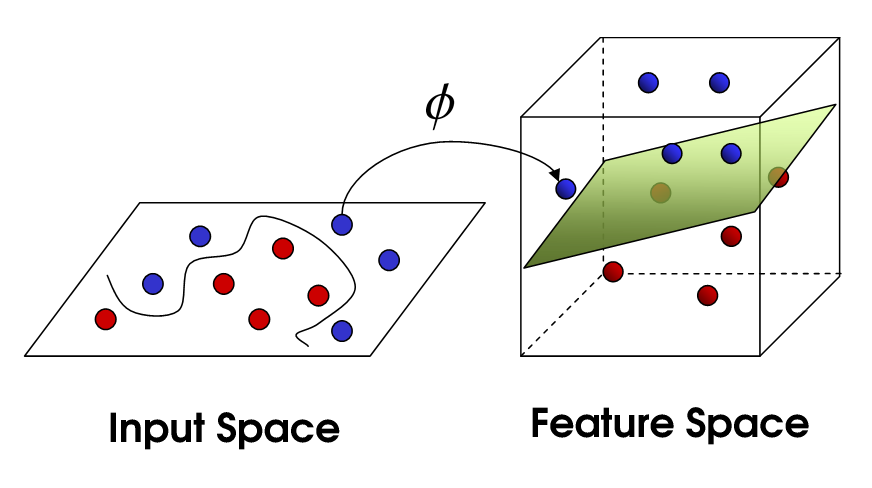

In [10]:
# 特徴量空間におけるカーネルトリック
url='http://i.imgur.com/WuxyO.png'
Image(url)

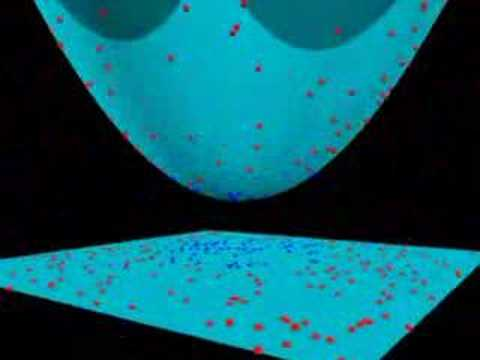

In [4]:
# カーネル法がよく分かる動画です。
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

## Part 3: その他の資料

英語になってしまいますが、その他の資料を挙げておきます。

In [5]:
# Andrew Ng先生の講義
YouTubeVideo('qdnT_jGTg2s')

####MIT Lecture

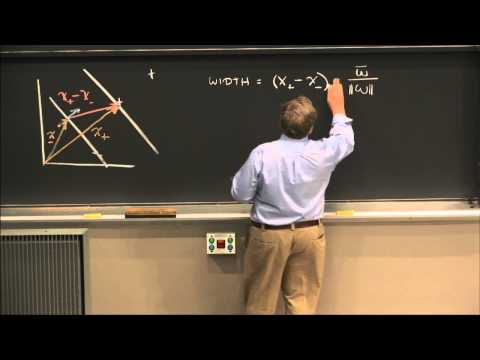

In [6]:
# MITの講義
YouTubeVideo('_PwhiWxHK8o')

## Part 4: scikit-learnを使ったSVMの実際

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

アヤメのデータをimportするところから始めます。

In [8]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data

Y = iris.target

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

パラメータについて、ドキュメントを参照してみてください。

[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classification) 

[SVM library of Sci Kit Learn](http://scikit-learn.org/stable/modules/svm.html)


In [9]:
from sklearn.svm import SVC

インスタンスを作ります。

In [10]:
model = SVC()

データを分けます。

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)                                                

In [12]:
# モデルをトレーニングします。
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

モデルの予測精度を見てみましょう。

In [14]:
from sklearn import metrics

predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected,predicted))

0.973684210526


非常に高い予測精度が得られました。

デフォルトでは、RBFカーネルが使われています。

それぞれのカーネルの違いを[scikit-learnのドキュメント](http://scikit-learn.org/stable/modules/svm.html#svm-classification)に詳しく載っています。

これを自分で作る方法を書いておきますので、興味がある方はやってみてください。

In [15]:
from sklearn import svm

# 図示できるのが2次元までなので、変数を2つに絞ります。
X = iris.data[:,:2]
Y = iris.target

# SVMの正則化パラメータです。
C = 1.0  

# SVC with a Linear Kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [16]:
# step size
h = 0.02

# X軸の最大最小
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y軸の最大最小
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# meshgridを作ります。
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [17]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/Users/teikanhei/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


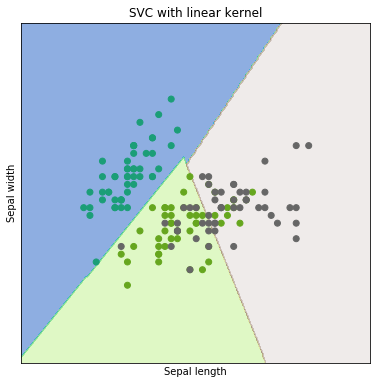

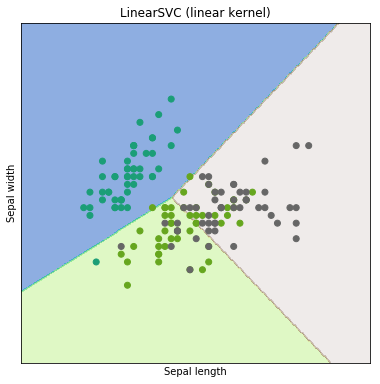

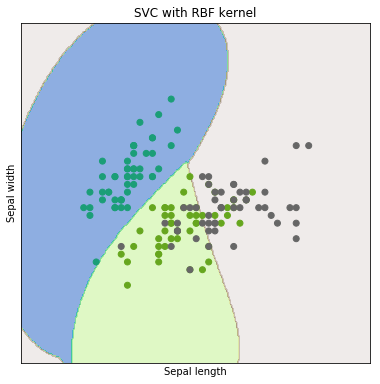

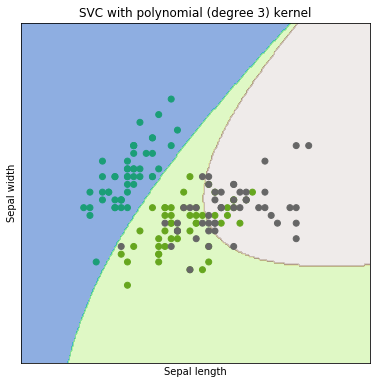

In [18]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # 境界線を描画します。
    plt.figure(figsize=(15,15))
    plt.subplot(2, 2, i + 1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()